# 1.記述子の作成

In [3]:
# ライブラリの読み込み
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from IPython.display import display

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.ML.Descriptors import MoleculeDescriptors

from mordred import Calculator, descriptors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist

import scipy

## データ読み込み

In [4]:
# データ読み込み、0列目(Material)をindexに
data = pd.read_csv('data/material_data.csv', index_col=0)

display(data.head())

,SMILES,Type,PL
Material,,,
BTD1,CC1(C)C2=CC(C3=C(N=S=N4)C4=C(C5=CC=C(C6=CC=CC=...,BTD,533.0
BTD2,CC1(C)C2=CC(C3=C(N=S=N4)C4=C(C5=CC=C(C6=CC=C(C...,BTD,540.0
BTD3,CC1(C)C2=C(C=CC(C3=CC(N4C(C=CC=C5)=C5C6=C4C=CC...,BTD,538.0
BTD4,CC1(C)C2=CC(C3=C(N=S=N4)C4=C(C5=CC=C(C6=CC=C(N...,BTD,584.0
BTD5,CC1(C)C2=CC(C3=C(N=S=N4)C4=C(C5=CC=C(C6=CC=C(C...,BTD,540.0


In [5]:
data.shape

(1258, 3)

In [6]:
# インデックスに重複があるか確認 (Trueなら重複あり)
print(f"インデックスに重複はありますか？: {data.index.has_duplicates}")

# どのインデックスが重複しているか確認
duplicate_indexes = data.index.value_counts()[data.index.value_counts() > 1]
if not duplicate_indexes.empty:
    print("\n重複しているインデックス:")
    print(duplicate_indexes)

インデックスに重複はありますか？: False


## Rdkit記述子計算

In [7]:
# smiles列を抽出
smiles = data['SMILES']

# 計算する記述子名の取得
descriptor_names = []

for descriptor_information in Descriptors.descList:
    descriptor_names.append(descriptor_information[0])

print('計算する記述子の数：', len(descriptor_names))

計算する記述子の数： 217


In [8]:
# 記述子の計算
# 計算機
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# 計算した記述子を入れるリスト
descriptors_rdkit = []

print('分子の数：', len(smiles))

for index, smiles_i in enumerate(smiles):
    print(index+1, '/', len(smiles))
    # molに
    mol = Chem.MolFromSmiles(smiles_i)
    # 追加
    descriptors_rdkit.append(descriptor_calculator.CalcDescriptors(mol))

# DataFrameに
descriptor_df = pd.DataFrame(descriptors_rdkit, index=data.index, columns=descriptor_names)

分子の数： 1258
1 / 1258
2 / 1258
3 / 1258
4 / 1258
5 / 1258
6 / 1258
7 / 1258
8 / 1258
9 / 1258
10 / 1258
11 / 1258
12 / 1258
13 / 1258
14 / 1258
15 / 1258
16 / 1258
17 / 1258
18 / 1258
19 / 1258
20 / 1258
21 / 1258
22 / 1258
23 / 1258
24 / 1258
25 / 1258
26 / 1258
27 / 1258
28 / 1258
29 / 1258
30 / 1258
31 / 1258
32 / 1258
33 / 1258
34 / 1258
35 / 1258
36 / 1258
37 / 1258
38 / 1258
39 / 1258
40 / 1258
41 / 1258
42 / 1258
43 / 1258
44 / 1258
45 / 1258
46 / 1258
47 / 1258
48 / 1258
49 / 1258
50 / 1258
51 / 1258
52 / 1258
53 / 1258
54 / 1258
55 / 1258
56 / 1258
57 / 1258
58 / 1258
59 / 1258
60 / 1258
61 / 1258
62 / 1258
63 / 1258
64 / 1258
65 / 1258
66 / 1258
67 / 1258
68 / 1258
69 / 1258
70 / 1258
71 / 1258
72 / 1258
73 / 1258
74 / 1258
75 / 1258
76 / 1258
77 / 1258
78 / 1258
79 / 1258
80 / 1258
81 / 1258
82 / 1258
83 / 1258
84 / 1258
85 / 1258
86 / 1258
87 / 1258
88 / 1258
89 / 1258
90 / 1258
91 / 1258
92 / 1258
93 / 1258
94 / 1258
95 / 1258
96 / 1258
97 / 1258
98 / 1258
99 / 1258
100 / 12

In [9]:
display(descriptor_df.head())

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Material,,,,,,,,,,,,,,,,,,,,,
BTD1,4.814638,4.814638,0.031632,-0.031632,0.216906,16.205128,520.701,492.477,520.197320,188,...,0,0,0,0,0,0,0,0,0,0
BTD2,5.006910,5.006910,0.211411,-0.211411,0.159110,14.233766,1003.287,952.887,1002.375619,364,...,0,0,0,0,0,0,0,0,0,0
BTD3,5.006077,5.006077,0.214711,-0.214711,0.166391,13.922078,1003.287,952.887,1002.375619,364,...,0,0,0,0,0,0,0,0,0,0
BTD4,4.969197,4.969197,0.216216,-0.216216,0.152454,14.153846,855.123,808.755,854.344318,312,...,0,0,0,0,0,0,0,0,0,0
BTD5,5.020606,5.020606,0.232982,-0.232982,0.159110,14.233766,1003.287,952.887,1002.375619,364,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 保存
os.makedirs("outputs/descriptors", exist_ok=True)
descriptor_df.to_csv("outputs/descriptors/descriptor_rdkit.csv", index=False)

## FP計算

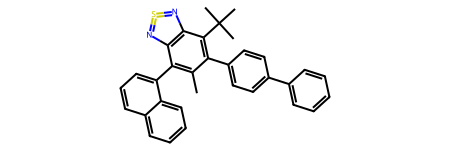

In [11]:
# molの作成
mols = [Chem.MolFromSmiles(smiles_i) for smiles_i in smiles]

# 正しく描写できる？
mols[-1]

In [12]:
# 3次元構造も見ておこう
smiles = [Chem.MolToSmiles(mol) for mol in mols]

In [13]:
# それぞれの方法で3次元構造を生成

def DG(mols):
    """
    ディスタンス・ジオメトリー（DG）法, 2018.03までのデフォルト方法
    """
    DG_uff = []
    mhs = [Chem.AddHs(mol) for mol in mols]
    for mol in mhs:
        AllChem.EmbedMolecule(mol,
                              useBasicKnowledge=False,
                              useExpTorsionAnglePrefs=False)
        if AllChem.UFFHasAllMoleculeParams(mol):
            AllChem.UFFOptimizeMolecule(mol)
            DG_uff.append(mol)
    return DG_uff

def ETDG(mols):
    """
    useExpTorsionAnglePrefs=True
    """
    ETDG_mols = []
    mhs = [Chem.AddHs(mol) for mol in mols]
    for mol in mhs:
        AllChem.EmbedMolecule(mol, AllChem.ETDG())
        ETDG_mols.append(mol)
    return ETDG_mols

def ETKDG(mols, version=1):
    """
    useBasicKnowledge=True
    useExpTorsionAnglePrefs=True
    2018.09以降のデフォルト方法
    """
    ETKDG_mols = []
    mhs = [Chem.AddHs(mol) for mol in mols]
    for mol in mhs:
        if version == 1:
            p = AllChem.ETKDG()
        elif version == 2:
            p = AllChem.ETKDGv2()
        elif version == 3:
            p = AllChem.ETKDGv3()
        else:
            print('invalid input')
        AllChem.EmbedMolecule(mol, p)
        ETKDG_mols.append(mol)
    return ETKDG_mols

In [14]:
# 3D構造生成
ETKDGv1_m = ETKDG(mols[0:5])

# 描写
IPythonConsole.drawMol3D(ETKDGv1_m[0])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [15]:
# fingerprintの計算
# 計算したFPを格納するlist
fingerprints = []

# generator を作成（半径2、ビット長2048）
generator = GetMorganGenerator(radius=2, fpSize=2048)

for mol in mols:
    try:
        fingerprint = generator.GetFingerprint(mol)
        fingerprints.append(list(fingerprint))

    except:
        print('error')
        continue

# numpy形式に
fingerprints_np = np.array(fingerprints)

# DataFrame形式に
fingerprints_df = pd.DataFrame(fingerprints_np, index=data.index)

In [16]:
fingerprints_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
Material,,,,,,,,,,,,,,,,,,,,,
BTD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTD2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTD3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTD4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTD5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# 保存
fingerprints_df.to_csv('outputs/descriptors/morganFP.csv', index=False)

## Mordred記述子の計算

In [18]:
# mol file作成
mols = []
molhs = []

for smiles_i in smiles:
    # 通常のmol file
    mol = Chem.MolFromSmiles(smiles_i)
    mols.append(mol)

    # 3次元構造の入ったmol file
    molh = Chem.AddHs(mol)
    AllChem.EmbedMolecule(molh, AllChem.ETKDG())
    molhs.append(molh)

In [19]:
# 2次元記述子の計算
calc_2d = Calculator(descriptors, ignore_3D=True)
df_2d = calc_2d.pandas(mols)

# 3次元記述子の計算
calc_3d = Calculator(descriptors, ignore_3D=False)
df_3d = calc_3d.pandas(molhs)

print(f"計算直後の2D記述子 shape: {df_2d.shape}")
print(f"計算直後の3D記述子 shape: {df_3d.shape}")

  1%|          | 12/1258 [00:09<15:10,  1.37it/s] 

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/

  1%|▏         | 17/1258 [00:09<07:09,  2.89it/s]

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 3/1258 [00:11<55:58,  2.68s/it]  

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 5/1258 [00:12<23:41,  1.13s/it]

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 11/1258 [00:12<05:43,  3.63it/s]

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 13/1258 [00:12<04:21,  4.77it/s]

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|▏         | 17/1258 [00:13<03:07,  6.63it/s]

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 19/1258 [00:13<02:43,  7.59it/s]

/opt/conda/envs/mol-regression-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1258/1258 [03:26<00:00,  6.09it/s]


計算直後の2D記述子 shape: (1258, 1613)
計算直後の3D記述子 shape: (1258, 1826)


- select_dtypes('number')を使ってしまうと、3D記述子の多くが数値（float）として出力されていないため、select_dtypes('number') によってフィルタリングされて除外されてしまっている可能性が高い

In [20]:
# 2D記述子
# まず、全ての非数値列を数値化しようと試みる (True/Falseは1/0になる)
non_numeric_cols_2d = df_2d.select_dtypes(exclude='number').columns
for col in non_numeric_cols_2d:
    df_2d[col] = pd.to_numeric(df_2d[col], errors='coerce')

# それでも数値化できなかった列（エラーオブジェクトなど）があれば、その列を削除する
cols_to_drop_2d = df_2d.select_dtypes(exclude='number').columns
if not cols_to_drop_2d.empty:
    print(f"完全に数値化できなかった2D列を削除: {list(cols_to_drop_2d)}")
    df_2d.drop(columns=cols_to_drop_2d, inplace=True)

# 3D記述子でも同様の処理
non_numeric_cols_3d = df_3d.select_dtypes(exclude='number').columns
for col in non_numeric_cols_3d:
    df_3d[col] = pd.to_numeric(df_3d[col], errors='coerce')

cols_to_drop_3d = df_3d.select_dtypes(exclude='number').columns
if not cols_to_drop_3d.empty:
    print(f"完全に数値化できなかった3D列を削除: {list(cols_to_drop_3d)}")
    df_3d.drop(columns=cols_to_drop_3d, inplace=True)

print(f"変換後の2D記述子 shape: {df_2d.shape}")
print(f"変換後の3D記述子 shape: {df_3d.shape}")

完全に数値化できなかった2D列を削除: ['Lipinski', 'GhoseFilter']
完全に数値化できなかった3D列を削除: ['Lipinski', 'GhoseFilter']
変換後の2D記述子 shape: (1258, 1611)
変換後の3D記述子 shape: (1258, 1824)


In [21]:
# 欠損値の割合が30%以上の列を削除
threshold = 0.3  

# 2D記述子
valid_cols_2d = df_2d.columns[df_2d.isnull().mean() < threshold]
df_2d_filtered = df_2d[valid_cols_2d]

# 3D記述子
valid_cols_3d = df_3d.columns[df_3d.isnull().mean() < threshold]
df_3d_filtered = df_3d[valid_cols_3d]

print(f"NaNが{threshold*100}%未満の2D記述子の数: {df_2d_filtered.shape[1]}")
print(f"NaNが{threshold*100}%未満の3D記述子の数: {df_3d_filtered.shape[1]}")

NaNが30.0%未満の2D記述子の数: 1427
NaNが30.0%未満の3D記述子の数: 1480


In [22]:
# 保存
df_2d_filtered.index = data.index
df_2d_filtered.to_csv('outputs/descriptors/descriptor_mordred_2d.csv', index=False)

# 保存
df_3d_filtered.index = data.index
df_3d_filtered.to_csv('outputs/descriptors/descriptor_mordred_3d.csv', index=False)

## おまけ
分子の可視化、3D構造を見てみる

In [23]:
import random
from rdkit.Chem.Draw import IPythonConsole

# ランダムなインデックスを取得（0 ～ len(molhs)-1）
idx = random.randint(0, len(molhs) - 1)

# その分子を3Dで描画
IPythonConsole.drawMol3D(molhs[idx])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.